In [ ]:
pip install tensorflow tensorflow-hub

1/1 [==============================] - 1s 884ms/step
The predicted clothing type is: ('Pant', 0.20549622, 0.120305195)


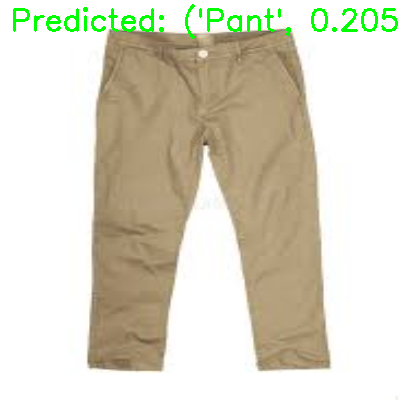

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import img_to_array, load_img


model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([hub.KerasLayer(model_url)])


class_labels = ['T-shirt', 'Pant']


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = tf.image.resize(img_array, (224, 224)) / 255.0
    img_array = tf.expand_dims(img_array, 0)
    return img_array

def predict_clothing_type(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    probability_tshirt = predictions[0][0]
    probability_pant = predictions[0][1]
    if probability_tshirt > 0.5:
        predicted_class = class_labels[0]  # T-shirt
    else:
        predicted_class = class_labels[1]  # Pant

    return predicted_class, probability_tshirt, probability_pant
from google.colab.patches import cv2_imshow

def display_result(image_path, predicted_class):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (400, 400))  # Adjust size for display
    cv2.putText(img, f'Predicted: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2_imshow(img)


image_path = '/content/clothes4.jpeg'
predicted_class = predict_clothing_type(image_path)
print(f"The predicted clothing type is: {predicted_class}")


#result
display_result(image_path, predicted_class)


1/1 [==============================] - 1s 858ms/step
The predicted clothing type is: T-shirt


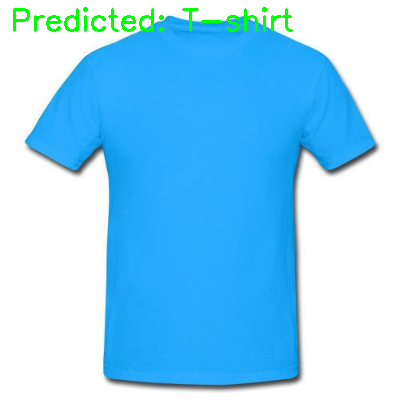

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import img_to_array, load_img


model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([hub.KerasLayer(model_url)])


class_labels = ['T-shirt', 'Pant']


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = tf.image.resize(img_array, (224, 224)) / 255.0
    img_array = tf.expand_dims(img_array, 0)
    return img_array



def predict_clothing_type(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = class_labels[int(predictions[0][0] > 0.5)]
    return predicted_class

from google.colab.patches import cv2_imshow

def display_result(image_path, predicted_class):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (400, 400))  # Adjust size for display
    cv2.putText(img, f'Predicted: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2_imshow(img)


image_path = '/content/clothes1.jpg'
predicted_class = predict_clothing_type(image_path)
print(f"The predicted clothing type is: {predicted_class}")


#result
display_result(image_path, predicted_class)
